In [9]:
#1.读取data中2023_6文件夹中的openrank数据集，分析美国排名前一百的项目的的value的最大值、最小值、均值以及中位数。

import pandas as pd

df = pd.read_csv('C:/Users/光影PRO/Desktop/DaSE/导论/open_rank_20236.csv')
value = df['value']

max_value = value.max()
min_value = value.min()
avg_value = value.mean()
median_value = value.median()

print("最大值:", max_value)
print("最小值:", min_value)
print("均值:", avg_value)
print("中位数:", median_value)


最大值: 1394.45
最小值: 200.68
均值: 346.9679
中位数: 273.66999999999996


In [88]:
#2.读取data中2022文件夹下的activity_2020文件，分析美国排名前十的项目的平均增长率。

import pandas as pd

df = pd.read_csv('C:/Users/光影PRO/Desktop/DaSE/导论/activity_2022.csv')
month_columns = [f'2022{i}_value' for i in range(1, 13)]

def calculate_growth_rate(row):
    values = row[month_columns].values
    growth_rates = []
    
    for i in range(1, len(values)):
        if values[i-1] != 0: 
            growth_rate = (values[i] - values[i-1]) / values[i-1] * 100
            growth_rates.append(growth_rate)
        else:
            growth_rates.append(0) 

    return sum(growth_rates) / len(growth_rates) if growth_rates else 0

df['average_growth_rate'] = df.apply(calculate_growth_rate, axis=1)

top_10_projects = df[['repo', 'average_growth_rate']]
print(top_10_projects)
print()

print(f"按照增长率进行排序：")
top_projects=df[['repo', 'average_growth_rate']].sort_values(by='average_growth_rate', ascending=False).head(10)
print(top_projects)


                                     repo  average_growth_rate
0                MicrosoftDocs/azure-docs            -1.792781
1                           NixOS/nixpkgs             0.029453
2                          dotnet/runtime            -2.284829
3                          elastic/kibana            -0.365071
4  firstcontributions/first-contributions            14.082374
5                         flutter/flutter            -1.240426
6                     home-assistant/core             0.845268
7                        microsoft/vscode             2.290469
8                         pytorch/pytorch             1.316038
9                          rust-lang/rust            -0.377805

按照增长率进行排序：
                                     repo  average_growth_rate
4  firstcontributions/first-contributions            14.082374
7                        microsoft/vscode             2.290469
8                         pytorch/pytorch             1.316038
6                     home-assistant/core  

In [89]:
#3.data/2022/china_2022.csv表示中国开源领域排名前十的企业。data/2022/global_2022.csv表示开源领域全球前十的的企业，请通过各种统计指标比较两者的各种数据差异

import pandas as pd

df_China = pd.read_csv('C:/Users/光影PRO/Desktop/DaSE/导论/china_2022.csv')
df_global = pd.read_csv('C:/Users/光影PRO/Desktop/DaSE/导论/global_2022.csv')

df_cleaned_China = df_China.dropna(subset=[col for col in df_China.columns if df_China[col].dtype in ['int64', 'float64']])
df_cleaned_global = df_global.dropna(subset=[col for col in df_global.columns if df_global[col].dtype in ['int64', 'float64']])

numeric_columns_China = df_cleaned_China.select_dtypes(include=['number']).columns
numeric_columns_Global = df_cleaned_global.select_dtypes(include=['number']).columns

common_columns = list(set(numeric_columns_China) & set(numeric_columns_Global))

# 比较每一列的统计指标
for column in common_columns:
    # China
    max_num = df_cleaned_China[column].max()
    min_num = df_cleaned_China[column].min()
    max_project = df_cleaned_China.loc[df_cleaned_China[column] == max_num, 'name'].tolist()
    min_project = df_cleaned_China.loc[df_cleaned_China[column] == min_num, 'name'].tolist()
    median_num = df_cleaned_China[column].median()
    mean_num = df_cleaned_China[column].mean()

    # Global
    max_value = df_cleaned_global[column].max()
    min_value = df_cleaned_global[column].min()
    max_pro = df_cleaned_global.loc[df_cleaned_global[column] == max_value, 'name'].tolist()
    min_pro = df_cleaned_global.loc[df_cleaned_global[column] == min_value, 'name'].tolist()
    median_value = df_cleaned_global[column].median()
    mean_value = df_cleaned_global[column].mean()

    print(f"{column}")
    print(f"最大值:")
    print(f"  China: {max_num} （{', '.join(max_project)}）")
    print(f"  Global: {max_value} （{', '.join(max_pro)}）")
    print(f"最小值:")
    print(f"  China: {min_num} （{', '.join(min_project)}）")
    print(f"  Global: {min_value} （{', '.join(min_pro)}）")
    print(f"中位数:")
    print(f"  China: {median_num}   Global: {median_value}")
    print(f"均值:")
    print(f"  China: {mean_num}   Global: {mean_value}")
    print()


value
最大值:
  China: 103368.49 （Alibaba）
  Global: 824848.67 （Microsoft）
最小值:
  China: 12033.71 （Deepin）
  Global: 71636.82 （Baidu）
中位数:
  China: 29789.235   Global: 102790.85
均值:
  China: 40269.534   Global: 215855.491

merged_pull
最大值:
  China: 26732 （Alibaba）
  Global: 257123 （Microsoft）
最小值:
  China: 1165 （ESPRESSIF）
  Global: 15418 （Meta）
中位数:
  China: 13705.5   Global: 33288.0
均值:
  China: 13764.1   Global: 62472.0

review_comment
最大值:
  China: 60402 （PingCAP）
  Global: 456166 （Microsoft）
最小值:
  China: 2113 （ESPRESSIF）
  Global: 35072 （Baidu）
中位数:
  China: 10851.0   Global: 70433.5
均值:
  China: 19857.5   Global: 120392.1

open_issue
最大值:
  China: 22397 （Alibaba）
  Global: 189185 （Microsoft）
最小值:
  China: 752 （Deepin）
  Global: 13162 （IBM）
中位数:
  China: 6889.5   Global: 21648.0
均值:
  China: 9169.2   Global: 43300.2

rankDelta
最大值:
  China: 25 （StarRocks）
  Global: 1 （Alibaba, HashiCorp, VMWare, Baidu）
最小值:
  China: 0 （Alibaba, Baidu, Ant group, PingCAP, Tencent, ESPRESSIF）
  Global

In [90]:
#4.贝叶斯定理

P_A=0.25
P_B_given_A=0.85  
P_B_given=0.10 
P_Software = 0.75  

P_B = P_B_given_A*P_A + P_B_given*P_Software
P_A_B = (P_B_given_A*P_A)/P_B

print(f"该项目是非软件型项目的概率是: {P_A_B:.6f}")


该项目是非软件型项目的概率是: 0.739130


In [91]:
#5.接上文，已知一个项目是由 JavaScript 语言编写的，那么它是工具组件型项目的概率是多少？

P_Tool = 0.50 
P_Non_Tool = 0.50  
P_JS_given_Tool = 0.35  
P_JS_given_Non_Tool = 0.10  

P_JS = P_JS_given_Tool*P_Tool+P_JS_given_Non_Tool*P_Non_Tool
P_Tool_given_JS = (P_JS_given_Tool*P_Tool) / P_JS

print(f"该项目是工具组件型项目的概率是: {P_Tool_given_JS:.4f}")


该项目是工具组件型项目的概率是: 0.7778


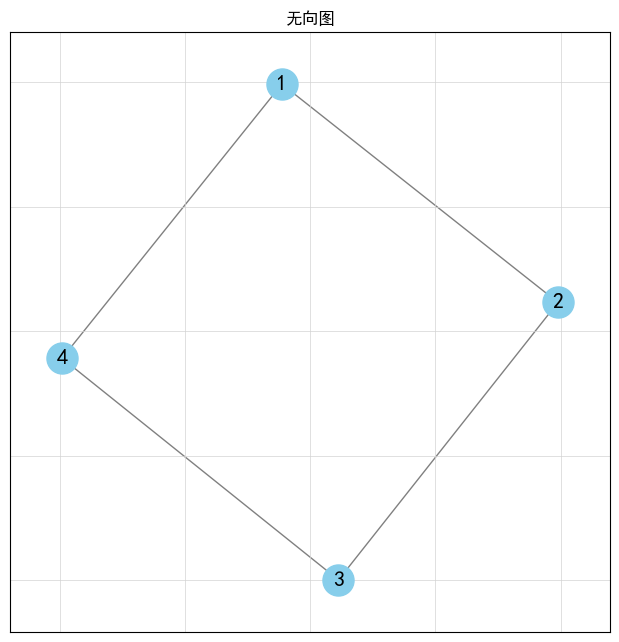

In [74]:
#6.根据以下数据建立可视化无向图
#user = [1, 2, 3, 4]
#edge = [(1, 2), (2, 3), (3, 4), (4, 1)]

import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import rcParams

user = [1, 2, 3, 4]
edges = [(1, 2), (2, 3), (3, 4), (4, 1)]

G = nx.Graph()
G.add_nodes_from(user)
G.add_edges_from(edges)

plt.figure(figsize=(6, 6))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=500, node_color='skyblue', font_size=16, font_weight='bold', edge_color='gray')

plt.axis('on') 
plt.grid(True, color='lightgray', linestyle='-', linewidth=0.5)
plt.title("无向图")
plt.show()


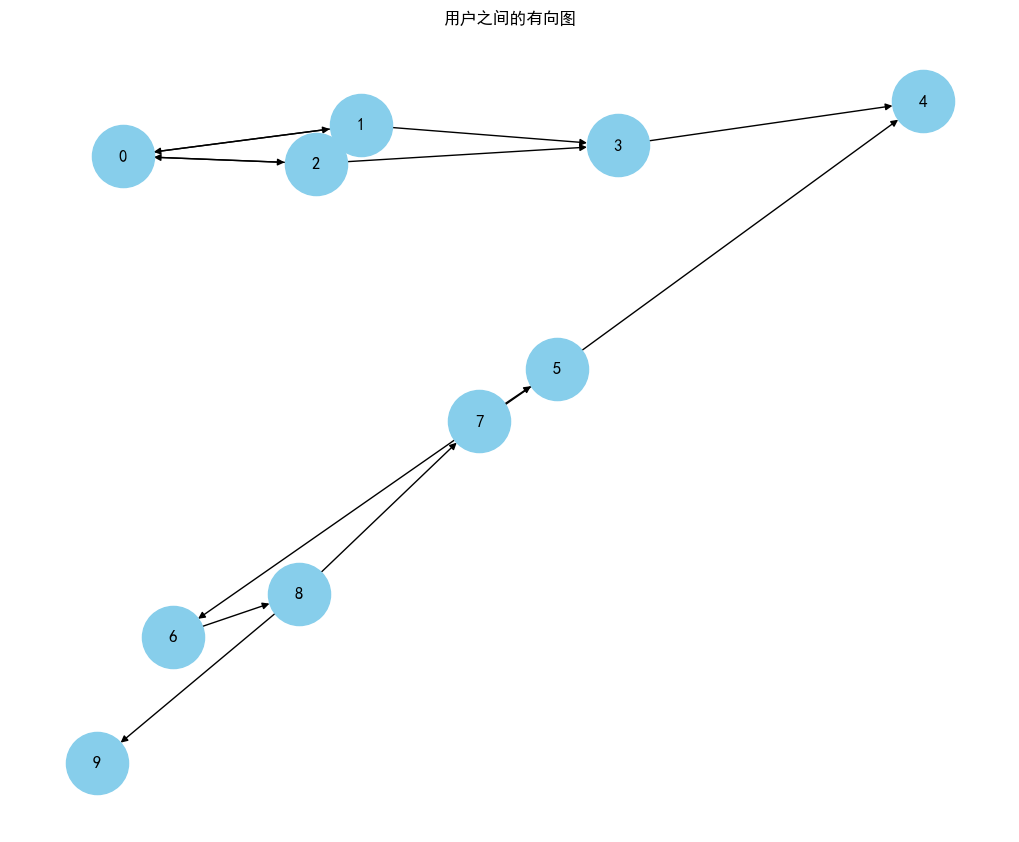

In [92]:
#7.根据以下数据建立可视化有向图
#users = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
#edges = [(0, 1), (1, 0), (0, 2), (2, 0), (1, 2), (2, 1), (1, 3), (2, 3), (3, 4), (5, 4), (5, 6), (7, 5), (6, 8), (8, 7), (8, 9)]

import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import rcParams

users = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
edges = [(0, 1), (1, 0), (0, 2), (2, 0), (1, 2), (2, 1), (1, 3), (2, 3), (3, 4), (5, 4), (5, 6), (7, 5), (6, 8), (8, 7), (8, 9)]

G = nx.DiGraph()
G.add_nodes_from(users)
G.add_edges_from(edges)

plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42) 
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='skyblue', font_size=12, font_weight='bold', arrows=True)

plt.title("用户之间的有向图")
plt.show()


节点 0 的 PageRank 值: 0.094991
节点 1 的 PageRank 值: 0.105477
节点 2 的 PageRank 值: 0.105477
节点 3 的 PageRank 值: 0.094991
节点 4 的 PageRank 值: 0.159317
节点 5 的 PageRank 值: 0.102011
节点 6 的 PageRank 值: 0.078575
节点 7 的 PageRank 值: 0.078575
节点 8 的 PageRank 值: 0.102011
节点 9 的 PageRank 值: 0.078575


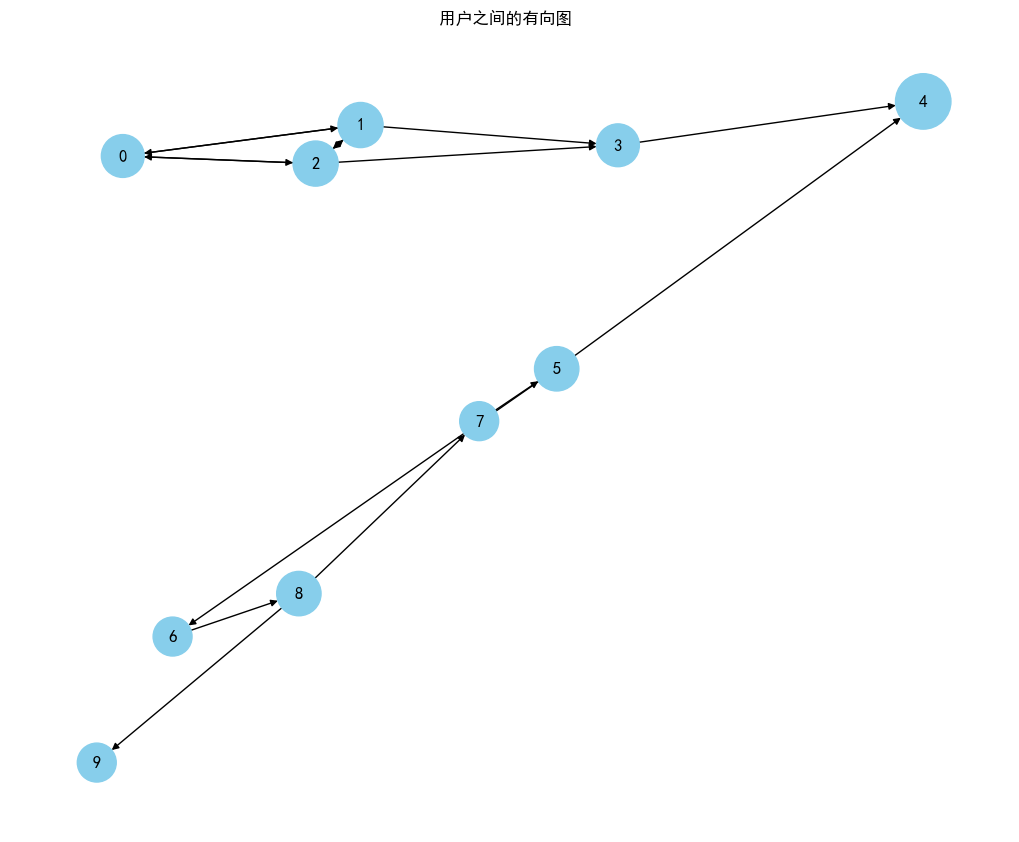

In [95]:
#8.计算并输出每个节点的pagerank值。同时根据pagerank调整可视化图的大小，使得PageRank越大的节点在可视化结果中也越大。

import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import rcParams

# 定义用户节点和边
users = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
edges = [(0, 1), (1, 0), (0, 2), (2, 0), (1, 2), (2, 1), (1, 3), (2, 3), (3, 4), (5, 4), (5, 6), (7, 5), (6, 8), (8, 7), (8, 9)]

G = nx.DiGraph()
G.add_nodes_from(users)
G.add_edges_from(edges)

pagerank = nx.pagerank(G, alpha=0.85)
for node, rank in pagerank.items():
    print(f"节点 {node} 的 PageRank 值: {rank:.6f}")
    
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42)
node_sizes = [pagerank[node] * 10000 for node in G.nodes]  
nx.draw(G, pos, with_labels=True, node_size=node_sizes, node_color='skyblue', font_size=12, font_weight='bold', arrows=True)

plt.title("用户之间的有向图 ")
plt.show()
